**TP2 - Algorithmes Gloutons**

Exercice 1 : Voyageur Glouton

1.   La fonction points(x,y) :






In [1]:
from random import randint
nbpoints=10 #Nombre de points choisis
dim=20 #Dimension du carré

def points(n,c):
  liste=[]
  while len(liste)<n:
    x=randint(-c,c)
    y=randint(-c,c)
    if [x, y] not in liste: #On génère une liste de points tous différents
      liste.append([x,y])
  return liste

print(points(nbpoints,dim))

[[7, 16], [20, -11], [1, 13], [-3, 19], [-14, 20], [4, 13], [-8, 0], [-18, 0], [9, 7], [6, 2]]


2.   Représentation des différents points



[[-4, 10], [0, 0], [3, -14], [5, -12], [-11, -4], [3, 3], [17, -7], [-5, 15], [-12, -10], [-14, -14]]
[-4, 0, 3, 5, -11, 3, 17, -5, -12, -14] [10, 0, -14, -12, -4, 3, -7, 15, -10, -14]


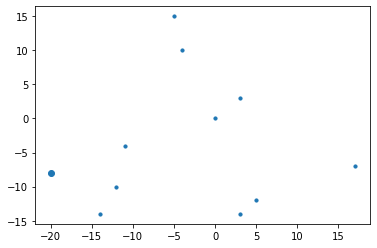

In [2]:
depart=(randint(-dim,dim),randint(-dim, dim))
import matplotlib.pyplot as plt
pts=points(nbpoints,dim)
print(pts)
x=[u[0] for u in pts] #On récupère les abscisses de pts
y=[u[1] for u in pts] #On récupère les ordonnées de pts
print(x,y)

plt.plot(depart[0],depart[1],"o")
#plt.plot(x,y,"x")
plt.scatter(x,y,10)
plt.show()

3. Les fonctions distance(p1,p2) et distances (pts,dep)

In [3]:
#Fonction qui calcule la distance entre 2 points
from math import sqrt
def distance(p1,p2):
    x1,y1=p1 #On récupère les coordonnées de P1 ou [x1,y1]=p1 fonctionne aussi
    x2,y2=p2 #On récupère les coordonnées de P2
    return sqrt((x1-x2)**2+(y1-y2)**2)

#On créé un tableau qui contient les distances entre les différents points
#considérés et entre chacun de ses points et le point de départ P
def distances(pts,dep):
    n=len(pts)
    tab=[(n+1)*[0] for i in range(n+1)] #On crée un tableau de (n+1) zéros (n+1) fois
    for i in range(n):
        for j in range(i):
            tab[i][j]=distance(pts[i],pts[j]) #On fait calculer la distance entre les différents points
            tab[j][i]=tab[i][j] #Symétrie du problème utilisé ici
        tab[n][i]=distance(dep,pts[i]) #On calcule par rapport au point de départ
        tab[i][n]=tab[n][i] #Symétrie du problème utilisé ici
    return tab

###### La fonction longueur non demandée dans le TD #####
#Cherchons une fonction qui calcule la distance totale parcourue
#En entrée on aura le chemin choisi et un tableau des distances
def longueur(chemin, dist):
  d=0
  id_pt=len(dist)-1
  for point in chemin:
    d=d+dist[id_pt][point]
    id_pt=point
  return d

  4. La stratégie gloutonne

In [4]:
#On crée une fonction indice qui applique la stratégie gloutonne en allant au
#point le plus proche du précédent.
def indice(position, dist, dispo):
  n=len(dist)-1
  mini=2*sqrt(2)*dim #distance maximale entre 2 points dans le carré de -dim à dim
  for i in range(n): #On va tester tous les points parmi les restants
    if dispo[i]==True: #Si true, c'est ok, si false c'est déjà pris
      d=dist[position][i]
      if d<mini:
        mini=d
        ind=i
  return ind

#Fonction qui construit le chemin à partir du tableau des distances à l'aide de "indice"
def glouton(dist):
  n=len(dist)-1
  chemin=[]
  dispo=n*[True] #Rien n'est utilisé comme point au départ
  position=n #On part du point de départ :)
  while len(chemin)<n:
    position=indice(position,dist,dispo) #Position représente l'indice à prendre à la stratégie gloutonne.
    chemin.append(position) #On remplit la liste
    dispo[position]=False #Pour que indice fonctionne.
  return chemin
# On a ainsi l'ordre des points à parcourir

  5. Tracé du chemin glouton

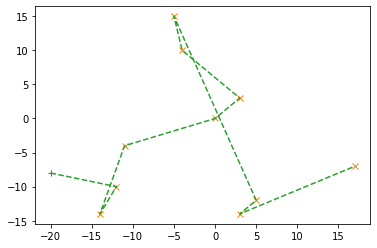

In [5]:
tableau=distances(pts,depart) #On crée le tableau en mettant départ en position 'n'
ch=glouton(tableau)
plt.plot(depart[0],depart[1],"+") #On affiche le pt de départ
plt.plot(x,y,"x") #On affiche les différents points
## print(longueur(ch,tableau))
xliste=[depart[0]]+[pts[k][0] for k in ch] #Concatenation des deux listes pour créer dans l'ordre les abcisses des pts
yliste=[depart[1]]+[pts[k][1] for k in ch] #Concatenation des deux listes pour créer dans l'ordre les ordonnées des pts

#affichage des chemins gloutons
plt.plot(xliste,yliste,"--")
plt.show()